# 0. 경로 지정

In [ ]:
import os
import sys

print(os.getcwd())
print(sys.path)
# 현재 노트북 경로 기준으로 상위 2단계 경로 계산
notebook_path = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_path, "..", ".."))

# 루트를 sys.path에 추가
if project_root not in sys.path:
    sys.path.append(project_root)



/Users/minsuson/Desktop/archive/Pseudo/Pseudo-Entertainment/tests/sms
['/opt/homebrew/Cellar/python@3.13/3.13.2/Frameworks/Python.framework/Versions/3.13/lib/python313.zip', '/opt/homebrew/Cellar/python@3.13/3.13.2/Frameworks/Python.framework/Versions/3.13/lib/python3.13', '/opt/homebrew/Cellar/python@3.13/3.13.2/Frameworks/Python.framework/Versions/3.13/lib/python3.13/lib-dynload', '', '/Users/minsuson/Desktop/archive/Pseudo/Pseudo-Entertainment/.venv/lib/python3.13/site-packages', '/Users/minsuson/Desktop/archive/Pseudo/Pseudo-Entertainment']


# 이미지 생성

In [2]:
from agents.image.modules.chains import set_image_generation_chain
from agents.image.modules.extracted_persona import PERSONA
chain = set_image_generation_chain()

In [8]:
import base64
from PIL import Image as PILImage
from io import BytesIO
from IPython.display import Image, display

def show_image(response, save_path):
    # base64 디코딩
    base64_str = response.content[-1].get('image_url').get('url').split(',')[-1]
    image_data = base64.b64decode(base64_str)
    
    # 이미지 열기 (PIL로)
    with BytesIO(image_data) as img_buffer:
        img = PILImage.open(img_buffer)
        # 512x512로 리사이즈
        img_resized = img.resize((512, 512), PILImage.LANCZOS)
        # 저장
        img_resized.save(save_path)

    # 디스플레이 (IPython)
    with open(save_path, 'rb') as f:
        display(Image(data=f.read()))

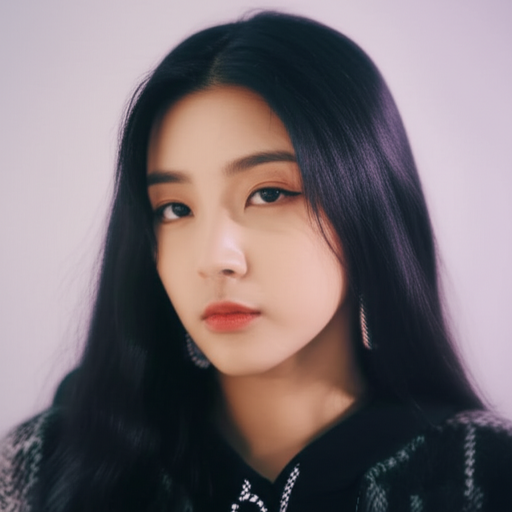

In [4]:
tries = 5

while tries > 0:
    ## IMAGE_SAFTEY 로 이미지가 생성이 되지 않는 경우를 피하기 위해서 tries
    response = chain.invoke({
        'persona' : PERSONA
    })

    if response.response_metadata.get('finish_reason') == 'IMAGE_SAFETY':
        tries -= 1
        print(f"Image Load {5-tries} Fail ...")
        continue
    else:
        save_path = os.path.join(notebook_path,  'try_01.png')
        show_image(response, save_path)
        break


## Image Reference

In [6]:
from agents.image.modules.chains import set_image_to_image_generation_chain
from agents.image.modules.extracted_persona_ver2 import PERSONA as PERSONA_VER2

image_chain = set_image_to_image_generation_chain()

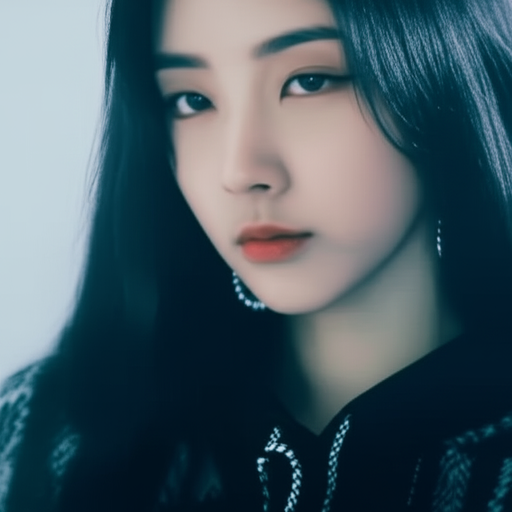

In [9]:
tries = 5

with open(os.path.join(notebook_path , 'try_01.png'), 'rb') as f:
    image_data = base64.b64encode(f.read()).decode('utf-8')

while tries > 0:
    response = image_chain.invoke({
        'persona' : PERSONA_VER2,
        'image_data' : image_data
    })

    if response.response_metadata.get('finish_reason') == 'IMAGE_SAFETY':
        tries -= 1
        print(f"Image Load {5-tries} Fail ...")
        continue
    else:
        save_path = os.path.join(notebook_path, 'with_fix_sample.png')
        show_image(response, save_path)
        break
